# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [1]:
from google.colab import files
files.upload()

Saving haberman.csv to haberman.csv


{'haberman.csv': b'30,64,1,1\r\n30,62,3,1\r\n30,65,0,1\r\n31,59,2,1\r\n31,65,4,1\r\n33,58,10,1\r\n33,60,0,1\r\n34,59,0,2\r\n34,66,9,2\r\n34,58,30,1\r\n34,60,1,1\r\n34,61,10,1\r\n34,67,7,1\r\n34,60,0,1\r\n35,64,13,1\r\n35,63,0,1\r\n36,60,1,1\r\n36,69,0,1\r\n37,60,0,1\r\n37,63,0,1\r\n37,58,0,1\r\n37,59,6,1\r\n37,60,15,1\r\n37,63,0,1\r\n38,69,21,2\r\n38,59,2,1\r\n38,60,0,1\r\n38,60,0,1\r\n38,62,3,1\r\n38,64,1,1\r\n38,66,0,1\r\n38,66,11,1\r\n38,60,1,1\r\n38,67,5,1\r\n39,66,0,2\r\n39,63,0,1\r\n39,67,0,1\r\n39,58,0,1\r\n39,59,2,1\r\n39,63,4,1\r\n40,58,2,1\r\n40,58,0,1\r\n40,65,0,1\r\n41,60,23,2\r\n41,64,0,2\r\n41,67,0,2\r\n41,58,0,1\r\n41,59,8,1\r\n41,59,0,1\r\n41,64,0,1\r\n41,69,8,1\r\n41,65,0,1\r\n41,65,0,1\r\n42,69,1,2\r\n42,59,0,2\r\n42,58,0,1\r\n42,60,1,1\r\n42,59,2,1\r\n42,61,4,1\r\n42,62,20,1\r\n42,65,0,1\r\n42,63,1,1\r\n43,58,52,2\r\n43,59,2,2\r\n43,64,0,2\r\n43,64,0,2\r\n43,63,14,1\r\n43,64,2,1\r\n43,64,3,1\r\n43,60,0,1\r\n43,63,2,1\r\n43,65,0,1\r\n43,66,4,1\r\n44,64,6,2\r\n44,58,9,

In [2]:
import pandas as pd
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axial_nodes","survival_status"])


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

# Exploratory Data Analysis

In [3]:
df.head()

,age,operation_Year,axial_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.groupby('survival_status').size()

survival_status
1    225
2     81
dtype: int64

**Observations**
- Checking the dataset is balanced or inbalanced
- from dataset detail we know that
   - 1 = the patient survived 5 years or longer =class 1
   - 2 = the patient died within 5 year - class 2
- It is observed that, there is information of 225 patients of 'class 1'
- It is observed that, there is information of 81 patients of 'class 2'


In [5]:
df.shape

(306, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_Year   306 non-null    int64
 2   axial_nodes      306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
df.isnull().count()

age                306
operation_Year     306
axial_nodes        306
survival_status    306
dtype: int64

**Observations**
- The shape function shows the size of the matrix
- The dataframe is having 306 Rows and 4 columns(features)


In [8]:
df.describe()

,age,operation_Year,axial_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observations**

- we can observe the statistics(min, max, mean, std dev, and quantiles) of the data
- The average age of patient who had undergone surgery for breast cancer is 52.45, minimum age is 30, maximum age is 83
- mean, min, max axial_nodes were 4.026, 0, 52


In [9]:
df.groupby('survival_status').describe()

age                              ... axial_nodes                 
                 count       mean        std   min  ...         25%  50%   75%   max
survival_status                                     ...                             
1                225.0  52.017778  11.012154  30.0  ...         0.0  0.0   3.0  46.0
2                 81.0  53.679012  10.167137  34.0  ...         1.0  4.0  11.0  52.0

[2 rows x 24 columns]

**Observations**

- It is observed that average of both class 1 and class 2 are nearly same as 52 and 53.67
- minimum  and maximum age  for class 1 is 30 and 77 and for class 2 is 34 and 83
- mean, min and max axil_nodes for class 1 is 2.79, 0, and 46 and for class 2 is 7.456, 0, and 52.

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

# Objective
- To find a given patient after undergoing surgery for breast cancer, will he/she live more than 5 years or not. 

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Histogram

Text(0.5, 1.0, 'Histogram of axial nodes')

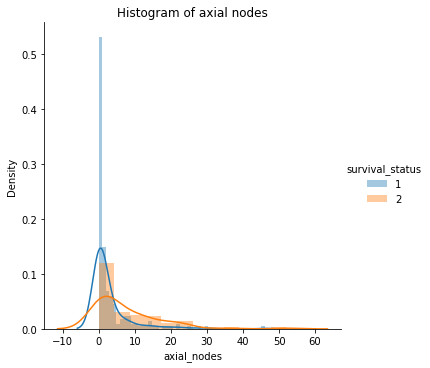

In [11]:
sns.FacetGrid(df,hue='survival_status',size=5).map(sns.distplot,'axial_nodes').add_legend()
plt.title('Histogram of axial nodes')

# PDF and CDF


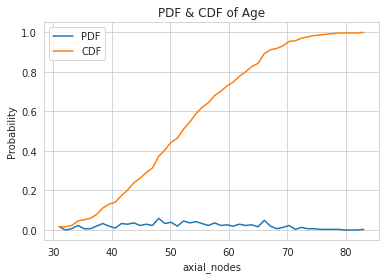

In [12]:
# PDF and CDF of Age

import numpy as np
count, bin_edge = np.histogram(df['age'],bins=50,density=True)

pdf = count/sum(count)        # Probability Distribution Function
sns.set_style('whitegrid')
plt.plot(bin_edge[1:],pdf)

cdf = np.cumsum(pdf)          # Cummulative Distributive function
plt.plot(bin_edge[1:],cdf)
plt.xlabel('axial_nodes')
plt.ylabel('Probability')
plt.title('PDF & CDF of Age')
plt.legend(('PDF','CDF'))

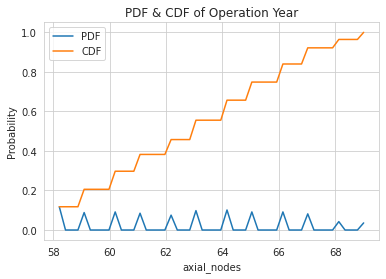

In [13]:
# PDF and CDF of Operation Year

import numpy as np
count, bin_edge = np.histogram(df['operation_Year'],bins=50,density=True)

pdf = count/sum(count)        # Probability Distribution Function
sns.set_style('whitegrid')
plt.plot(bin_edge[1:],pdf)

cdf = np.cumsum(pdf)          # Cummulative Distributive function
plt.plot(bin_edge[1:],cdf)
plt.xlabel('axial_nodes')
plt.ylabel('Probability')
plt.title('PDF & CDF of Operation Year')
plt.legend(('PDF','CDF'))

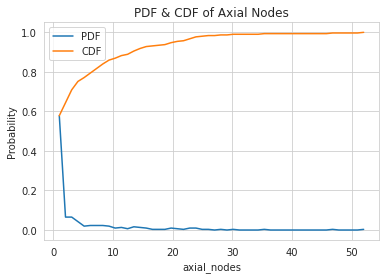

In [14]:
# PDF and CDF of Axial Nodes

import numpy as np
count, bin_edge = np.histogram(df['axial_nodes'],bins=50,density=True)

pdf = count/sum(count)        # Probability Distribution Function
sns.set_style('whitegrid')
plt.plot(bin_edge[1:],pdf)

cdf = np.cumsum(pdf)          # Cummulative Distributive function
plt.plot(bin_edge[1:],cdf)
plt.xlabel('axial_nodes')
plt.ylabel('Probability')
plt.title('PDF & CDF of Axial Nodes')
plt.legend(('PDF','CDF'))

**Observations**

- From CDF curve of axial_nodes, we can see that around 99% of axial nodes points lie less than 30.
- From PDF curve of axial_nodes, around 58% of points have axial node value zero.

# Violin plot
- Violin Plots for Individual classes and violin plot for each year are plotted

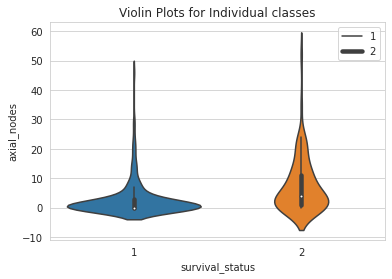

In [15]:
sns.violinplot(data=df,x='survival_status',y='axial_nodes',size=2)
plt.title('Violin Plots for Individual classes')
plt.legend(('1','2'))

Text(0.5, 1.0, 'Violin plot for Each Operation Year')

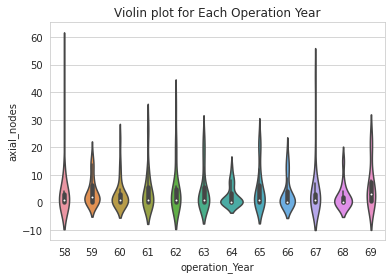

In [16]:
sns.violinplot(data=df,x='operation_Year',y='axial_nodes',size=2)
plt.title('Violin plot for Each Operation Year')

# Box Plot

Text(0.5, 1.0, 'Box plot for Individual Classes')

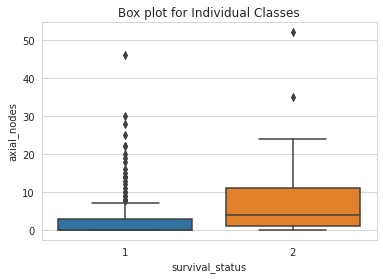

In [17]:
sns.boxplot(x = "survival_status", y = "axial_nodes", data = df)
plt.title('Box plot for Individual Classes')

Text(0.5, 1.0, 'Box plot for Axial nodes')

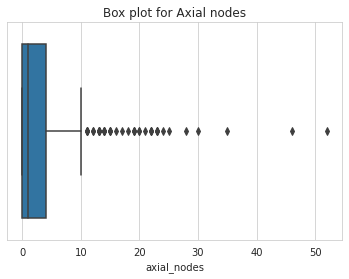

In [18]:
sns.boxplot(df['axial_nodes'])
plt.title('Box plot for Axial nodes')

**Observations**

- Graphically depicts numerical data through their quantiles.
- Box extends from q1 to q3 quantile values of dat, with line at median(q2).
- It is observed that, one point is highly deviated in 'class 1' and two points highly deviated in 'class 2'.
- In axial nodes box plot, 5 points are more deviated than others.

# z-score

In [19]:
df.shape

(306, 4)

In [20]:
import scipy.stats as stats
z = stats.zscore(df)

In [21]:
df_zscore = df[(z<=3).all(axis=1)]
df_zscore.shape

(301, 4)

**Observations**

- If z-score is greater than 3 or less than -3, then it we may connsider it as an outlier.
- Below, we can see that there are actually 306 data points. but the no.of data points whose values lie in between [-3, +3] are 301 data points.
- so, we may consider these 5 data points as outliers

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


# Pair plot
- It plots the relationships between all the features
- By plotting all the plots, we can observe which are important plots, so that we plot those specific plots and extract information fro them. 

Text(0.5, 1.0, 'Pair plots')

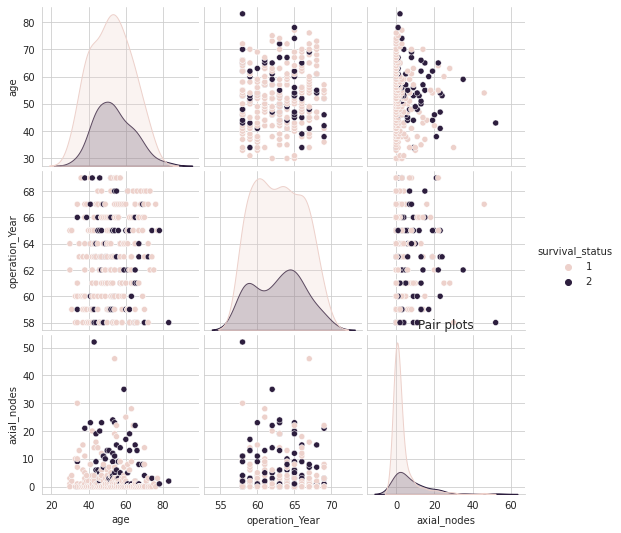

In [22]:
sns.pairplot(df,hue='survival_status')

plt.title('Pair plots')

# Scatter plot
- from pair-plots, we observed that there is some relationship between axial_nodes vs age and axial_nodes vs operation year


Text(0.5, 1.0, 'Scatter plot - Axial Nodes vs Age')

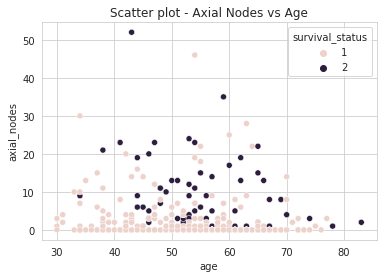

In [23]:
sns.scatterplot(data=df, x='age',y='axial_nodes',hue='survival_status')
plt.title('Scatter plot - Axial Nodes vs Age')

Text(0.5, 1.0, 'Scatter plot - Axial Nodes vs operation Year')

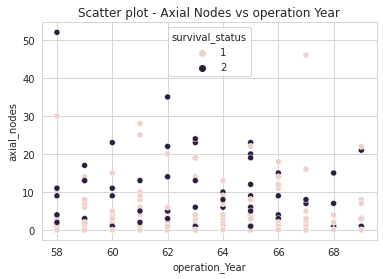

In [29]:
sns.scatterplot(data=df, x='operation_Year',y='axial_nodes',hue='survival_status')
plt.title('Scatter plot - Axial Nodes vs operation Year')

**Observations**

- scatter plot is drawn on axial_nodes vs age and axial_nodes vs operation year
-  In 1st scatter plot, Persons who died with cancer are mostly in the age of 45-60 and the axial_nodes are randomly distributed for person who died with cancer and most of their axial_nodes are in range of 0-5. 
- In 2nd scatter plot, in 50th year we can 2 points are highly deviated than the points recorded in that year. those two points may be outliers.

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

**Observations**

**From Scatter plots and Pair plots**

- Axial Nodes is the most important feature and its relationship with age and the operation year gives better information for classification.

**From PDF, CDF, Boxplot, Voilin plots**

- From CDF curve of axial_nodes, we can see that around 99% of axial nodes points lie less than 30.
- From PDF curve of axial_nodes, around 58% of points have axial node value zero.
- There may be 0 to 5 outliers based on the information from box-plot, z-score, and scatter-plot. 